Constructing PCA feature space

In [29]:
import pandas as pd
df_non_sliding_2class = pd.read_csv('/content/sample_data/image01 (1).csv')
df_sliding_2class = pd.read_csv('/content/sample_data/image01_sliding.csv')
df_non_sliding_3class = pd.read_csv('/content/sample_data/image012 (1).csv')
df_sliding_3class = pd.read_csv('/content/sample_data/image012_sliding.csv')


In [30]:
import cv2
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA


# Function to apply PCA to feature vectors and reduce dimensionality
def apply_pca(feature_vectors, num_components=64):
    pca = PCA(n_components=num_components)
    feature_vectors_pca = pca.fit_transform(feature_vectors)
    return feature_vectors_pca

# Number of PCA components you want to keep
num_pca_components = 64

# Apply PCA to the non-sliding 2-class feature vectors
non_sliding_2class_feature_vectors = df_non_sliding_2class.iloc[:, :-1].values
non_sliding_2class_labels = df_non_sliding_2class['label'].values
non_sliding_2class_feature_vectors_pca = apply_pca(non_sliding_2class_feature_vectors, num_components=num_pca_components)

# Create a new Pandas DataFrame for the PCA-transformed non-overlapfping 2-class feature vectors
df_non_sliding_2class_pca = pd.DataFrame(non_sliding_2class_feature_vectors_pca)
df_non_sliding_2class_pca['label'] = non_sliding_2class_labels

# Export the PCA-transformed DataFrame to a CSV file for non-sliding 2-class
df_non_sliding_2class_pca.to_csv('block_feature_vectors_non_sliding_2class_pca.csv', index=False)

# Apply PCA to the sliding 2-class feature vectors
sliding_2class_feature_vectors = df_sliding_2class.iloc[:, :-1].values
sliding_2class_labels = df_sliding_2class['label'].values
sliding_2class_feature_vectors_pca = apply_pca(sliding_2class_feature_vectors, num_components=num_pca_components)

# Create a new Pandas DataFrame for the PCA-transformed sliding 2-class feature vectors
df_sliding_2class_pca = pd.DataFrame(sliding_2class_feature_vectors_pca)
df_sliding_2class_pca['label'] = sliding_2class_labels

# Export the PCA-transformed DataFrame to a CSV file for sliding 2-class
df_sliding_2class_pca.to_csv('block_feature_vectors_sliding_2class_pca.csv', index=False)

# Apply PCA to the non-sliding 3-class feature vectors
non_sliding_3class_feature_vectors = df_non_sliding_3class.iloc[:, :-1].values
non_sliding_3class_labels = df_non_sliding_3class['label'].values
non_sliding_3class_feature_vectors_pca = apply_pca(non_sliding_3class_feature_vectors, num_components=num_pca_components)

# Create a new Pandas DataFrame for the PCA-transformed non-sliding 3-class feature vectors
df_non_sliding_3class_pca = pd.DataFrame(non_sliding_3class_feature_vectors_pca)
df_non_sliding_3class_pca['label'] = non_sliding_3class_labels

# Export the PCA-transformed DataFrame to a CSV file for non-sliding 3-class
df_non_sliding_3class_pca.to_csv('block_feature_vectors_non_sliding_3class_pca.csv', index=False)

# Apply PCA to the sliding 3-class feature vectors
sliding_3class_feature_vectors = df_sliding_3class.iloc[:, :-1].values
sliding_3class_labels = df_sliding_3class['label'].values
sliding_3class_feature_vectors_pca = apply_pca(sliding_3class_feature_vectors, num_components=num_pca_components)

# Create a new Pandas DataFrame for the PCA-transformed sliding 3-class feature vectors
df_sliding_3class_pca = pd.DataFrame(sliding_3class_feature_vectors_pca)
df_sliding_3class_pca['label'] = sliding_3class_labels

# Export the PCA-transformed DataFrame to a CSV file for sliding 3-class
df_sliding_3class_pca.to_csv('block_feature_vectors_sliding_3class_pca.csv', index=False)

# Display the PCA-transformed DataFrames
print("PCA-Transformed 2-Class Non-sliding:")
print(df_non_sliding_2class_pca)

print("\nPCA-Transformed 2-Class sliding:")
print(df_sliding_2class_pca)

print("\nPCA-Transformed 3-Class Non-sliding:")
print(df_non_sliding_3class_pca)

print("\nPCA-Transformed 3-Class sliding:")
print(df_sliding_3class_pca)

PCA-Transformed 2-Class Non-sliding:
              0           1           2           3           4           5  \
0    855.508777 -265.947350   32.491343   43.099299   20.482238 -202.638729   
1   -179.633502  -27.568850   67.050497  -25.024492    2.782818  -12.235118   
2   -122.904631 -154.674534 -116.929846   41.886120  -81.047787   64.083480   
3   -523.036284  152.372579  205.106658   22.209312  -98.115833  104.108267   
4    703.812120 -126.126872   22.603971  -11.650718   14.035107    3.658630   
..          ...         ...         ...         ...         ...         ...   
283 -262.539086  -87.858177   13.606606 -106.730248   -0.839659  -87.490127   
284  773.554129  136.576350  228.395992  -58.209348  258.636149  -55.338221   
285   19.837663   19.055464   13.731515   14.591599    7.384842   -5.866631   
286   12.765373 -478.573659   74.052982   24.666436   80.115248   61.912862   
287  660.163873 -516.762473   97.262694 -173.408041   30.608050   -7.882985   

              

 Splitting into training and testing

In [12]:
from sklearn.model_selection import train_test_split
import pandas as pd

# List of PCA-transformed CSV file paths
csv_files = [
    "block_feature_vectors_sliding_3class_pca.csv",
    "block_feature_vectors_non_sliding_3class_pca.csv",
    "block_feature_vectors_sliding_2class_pca.csv",
    "block_feature_vectors_non_sliding_2class_pca.csv"
]

for csv_file in csv_files:
    # Read the PCA-transformed CSV file
    df = pd.read_csv(csv_file)

    # Split the data into training (80%) and testing (20%) sets
    X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

    # Define the file names for training and testing data
    training_file = f"training_data_{csv_files.index(csv_file) + 1}.csv"
    testing_file = f"testing_data_{csv_files.index(csv_file) + 1}.csv"

    # Save the subsets to files
    X_train.to_csv(training_file, index=False)
    X_test.to_csv(testing_file, index=False)


Plotting the Histogram

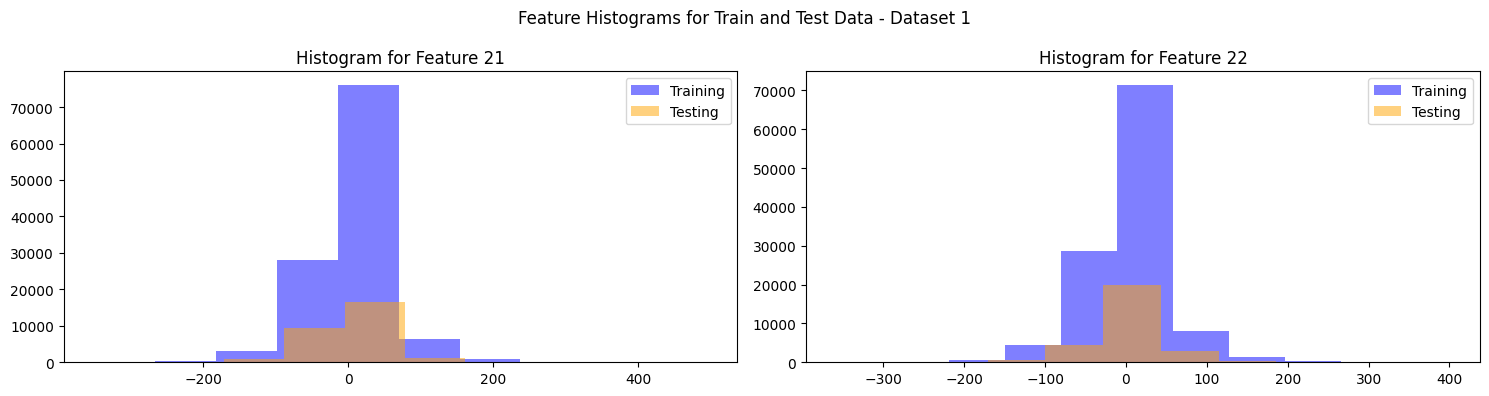

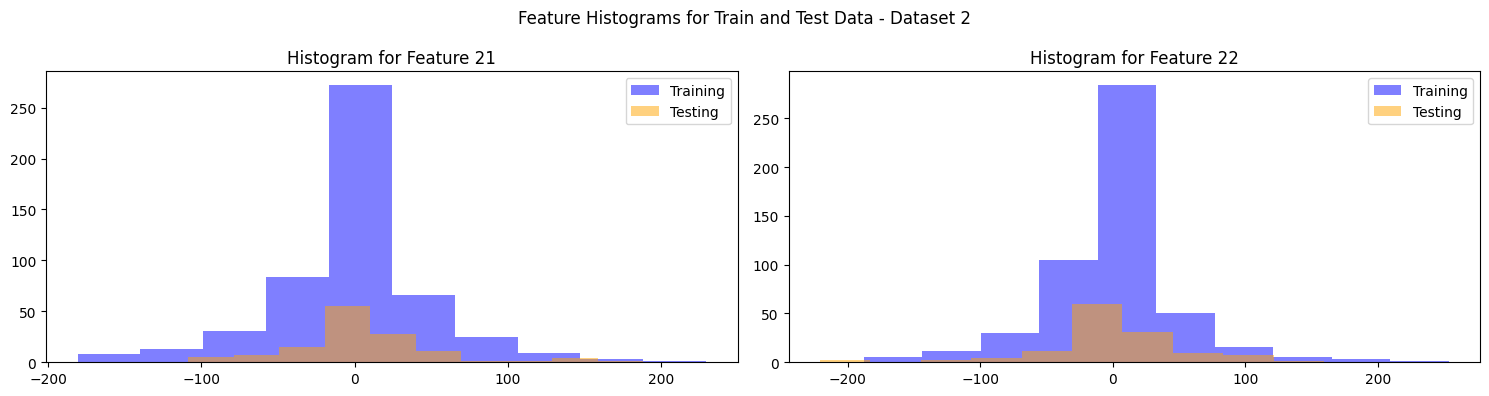

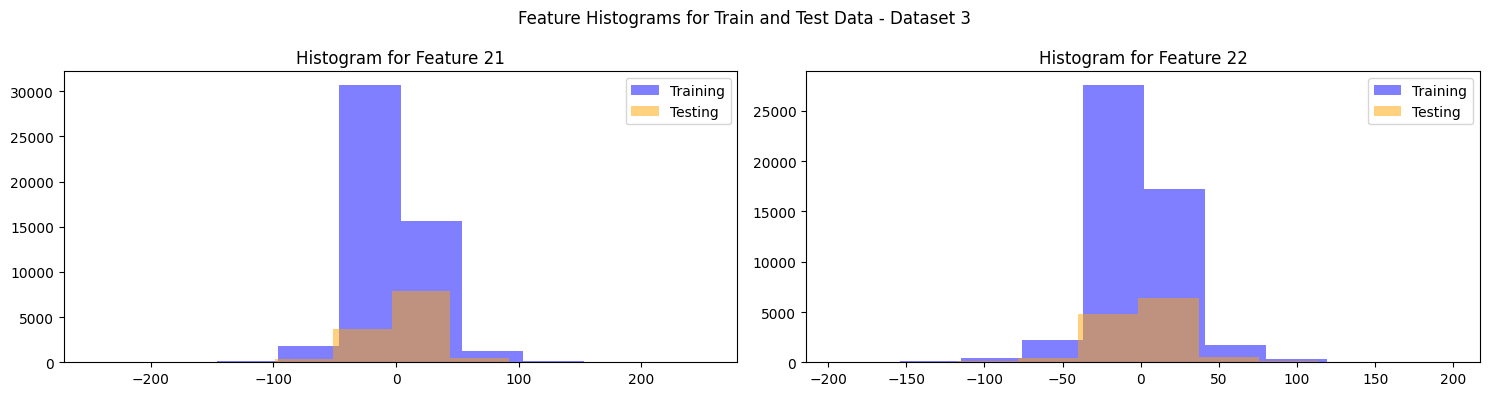

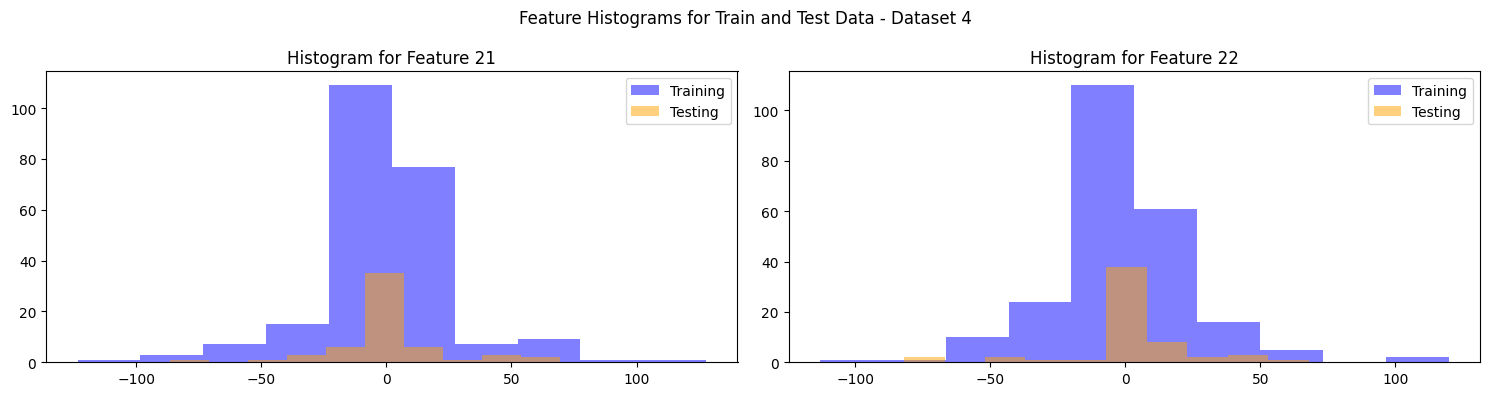

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the list of file names for training and testing data
training_files = ["training_data_1.csv", "training_data_2.csv", "training_data_3.csv", "training_data_4.csv"]
testing_files = ["testing_data_1.csv", "testing_data_2.csv", "testing_data_3.csv", "testing_data_4.csv"]



features = ['21', '22']

for i in range(len(training_files)):
    # Read the training and testing data
    X_train = pd.read_csv(training_files[i])
    X_test = pd.read_csv(testing_files[i])

    # Create subplots for each feature
    features_number = len(features)
    fig, axes = plt.subplots(1, features_number, figsize=(15, 4))

    for j, feature in enumerate(features):
        ax = axes[j]
        ax.hist(X_train[feature], alpha=0.5, label='Training', color='blue')
        ax.hist(X_test[feature], alpha=0.5, label='Testing', color='orange')
        ax.set_title(f'Histogram for Feature {feature}')
        ax.legend(loc='upper right')

    # Set a common title for the entire subplot
    plt.suptitle(f'Feature Histograms for Train and Test Data - Dataset {i + 1}')

    # Adjust the layout to avoid overlap
    plt.tight_layout()

    # Show the subplot for this dataset
    plt.show()


Plotting the scatter plot.

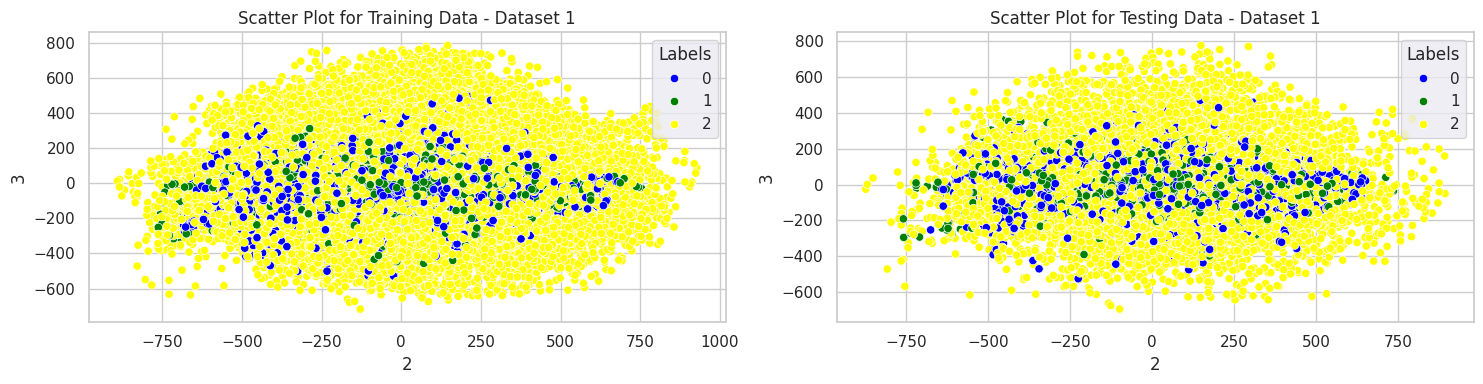

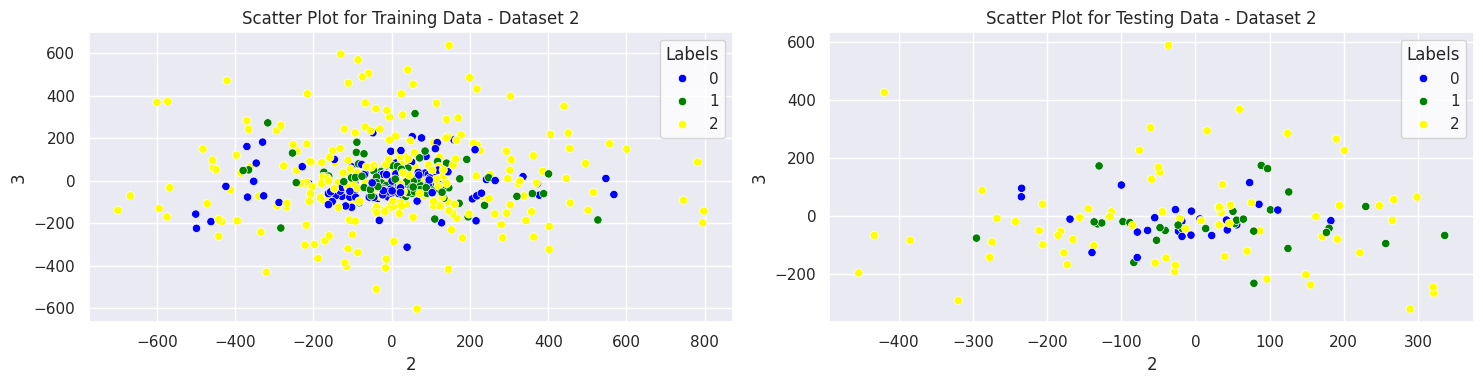

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the list of file names for training and testing data
training_files = ["training_data_1.csv", "training_data_2.csv"]
testing_files = ["testing_data_1.csv", "testing_data_2.csv"]

# Define the list of label values (change these to match your labels)
labels = [0, 1,2]
custom_palette = ["blue", "green", "yellow"]
# Define styles for the plots
styles = ['darkgrid', 'whitegrid', 'white']

for i in range(len(training_files)):
    # Read the training and testing data
    X_train = pd.read_csv(training_files[i])
    X_test = pd.read_csv(testing_files[i])

    # Create subplots for training and testing data
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))

    for j, data in enumerate([X_train, X_test]):
        ax = axes[j]

        # Create a scatter plot for all features with labels as hue
        sns.set(style=styles[i])
        sns.scatterplot(data=data, x='2', y='3', hue='label', palette=custom_palette, ax=ax)
        ax.set_title(f'Scatter Plot for {"Training" if j == 0 else "Testing"} Data - Dataset {i + 1}')
        ax.legend(loc='upper right', title='Labels')

    # Adjust the layout to avoid overlap
    plt.tight_layout()

    # Show the subplots for this dataset
    plt.show()



<ipython-input-18-6b4b695eefc2>:26: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(data=data, x='2', y='3', hue='label', palette= custom_palette, ax=ax)
<ipython-input-18-6b4b695eefc2>:26: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(data=data, x='2', y='3', hue='label', palette= custom_palette, ax=ax)


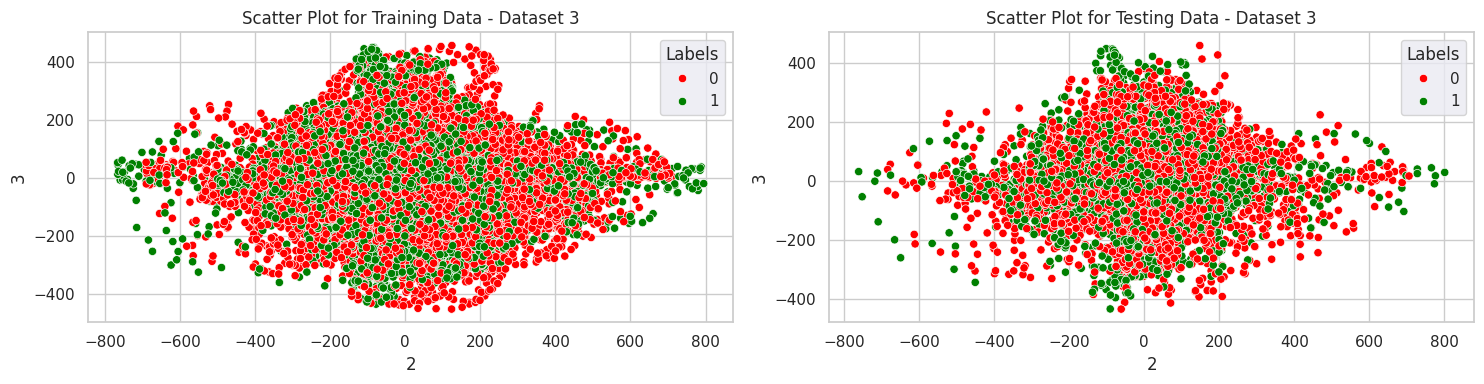

<ipython-input-18-6b4b695eefc2>:26: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(data=data, x='2', y='3', hue='label', palette= custom_palette, ax=ax)
<ipython-input-18-6b4b695eefc2>:26: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(data=data, x='2', y='3', hue='label', palette= custom_palette, ax=ax)


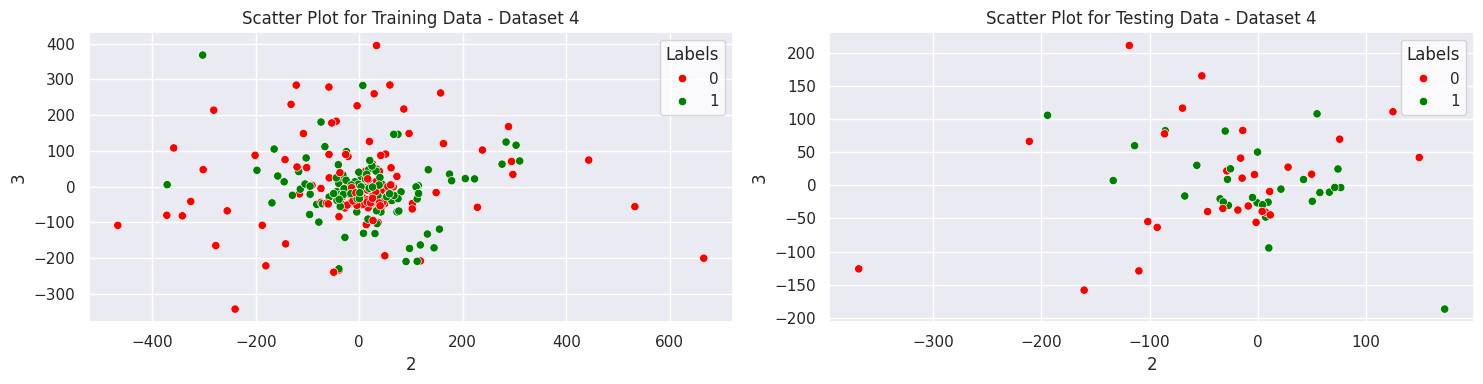

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the list of file names for training and testing data
training_files = [ "training_data_3.csv", "training_data_4.csv"]
testing_files = [ "testing_data_3.csv", "testing_data_4.csv"]

custom_palette = ["red", "green", "blue"]
# Define the styles for the plots
styles = ['darkgrid', 'whitegrid', 'dark', 'white']

for i in range(len(training_files)):
    # Read the training and testing data
    X_train = pd.read_csv(training_files[i])
    X_test = pd.read_csv(testing_files[i])

    # Create subplots for training and testing data
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))

    for j, data in enumerate([X_train, X_test]):
        ax = axes[j]

        # Create a scatter plot for binary classification data
        sns.set(style=styles[i])
        sns.scatterplot(data=data, x='2', y='3', hue='label', palette= custom_palette, ax=ax)
        ax.set_title(f'Scatter Plot for {"Training" if j == 0 else "Testing"} Data - Dataset {i + 3}')
        ax.legend(loc='upper right', title='Labels')

    # Adjust the layout to avoid overlap
    plt.tight_layout()

    # Show the subplots for this dataset
    plt.show()


## Lasso regression

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Define a list of file names for the datasets
sliding_two_class_classifier = "/content/block_feature_vectors_sliding_2class_pca.csv"

# Define the alpha (regularization strength) for the Lasso model
alpha = 1.0  # You can adjust this as needed

#for i, csv_file in enumerate(csv_files):
    # Load the dataset
sliding_two_class_classifier_df = pd.read_csv(sliding_two_class_classifier)

# Split the data into training and testing sets
X = sliding_two_class_classifier_df.drop('label', axis=1)  # Features
y = sliding_two_class_classifier_df['label']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Lasso regression model
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso_model.predict(X_test)

# Convert predicted values to binary class labels
y_pred_binary = [round(value) for value in y_pred]  # Adjust the threshold as needed

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary, average='macro')
recall = recall_score(y_test, y_pred_binary, average='macro')
f1 = f1_score(y_test, y_pred_binary, average='macro')

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred_binary)

# Print the results
print(f"Lasso Model - Dataset { 1}")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)

Lasso Model - Dataset 1
Accuracy: 0.5100514634930846
Precision: 0.5097731521290536
Recall: 0.5096237423753627
F1 Score: 0.5079485073382528
Confusion Matrix:
[[3578 2683]
 [3410 2765]]


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Define a list of file names for the datasets
non_sliding_two_class_classifier = "/content/block_feature_vectors_non_sliding_2class_pca.csv"

# Define the alpha (regularization strength) for the Lasso model
alpha = 1.0  # You can adjust this as needed

#for i, csv_file in enumerate(csv_files):
    # Load the dataset
non_sliding_two_class_classifier_df = pd.read_csv(non_sliding_two_class_classifier)

# Split the data into training and testing sets
X = non_sliding_two_class_classifier_df.drop('label', axis=1)  # Features
y = non_sliding_two_class_classifier_df['label']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Lasso regression model
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso_model.predict(X_test)

# Convert predicted values to binary class labels
y_pred_binary = [round(value) for value in y_pred]  # Adjust the threshold as needed

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary, average='macro')
recall = recall_score(y_test, y_pred_binary, average='macro')
f1 = f1_score(y_test, y_pred_binary, average='macro')

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred_binary)

# Print the results
print(f"Lasso Model - Dataset { 1}")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)

Lasso Model - Dataset 1
Accuracy: 0.5344827586206896
Precision: 0.5366161616161615
Recall: 0.5344827586206896
F1 Score: 0.527601809954751
Confusion Matrix:
[[19 10]
 [17 12]]


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Define a list of file names for the datasets
sliding_three_class_classifier = "/content/block_feature_vectors_sliding_3class_pca.csv"

# Define the alpha (regularization strength) for the Lasso model
alpha = 1.0  # You can adjust this as needed

sliding_three_class_classifier_df = pd.read_csv(sliding_three_class_classifier)

# Split the data into training and testing sets
X = sliding_three_class_classifier_df.drop('label', axis=1)  # Features
y = sliding_three_class_classifier_df['label']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Lasso regression model
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso_model.predict(X_test)

# Convert predicted values to binary class labels
y_pred_binary = [round(value) for value in y_pred]  # Adjust the threshold as needed

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary, average='macro')
recall = recall_score(y_test, y_pred_binary, average='macro')
f1 = f1_score(y_test, y_pred_binary, average='macro')

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred_binary)

# Print the results
print(f"Lasso Model - Dataset { 1}")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)

Lasso Model - Dataset 1
Accuracy: 0.3279054360333345
Precision: 0.3210509789023075
Recall: 0.37933908319110216
F1 Score: 0.2438930151908475
Confusion Matrix:
[[    0  5324   857]
 [    0  5564   598]
 [    0 12496  3840]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Define a list of file names for the datasets
non_sliding_three_class_classifier = "/content/block_feature_vectors_non_sliding_3class_pca.csv"

# Define the alpha (regularization strength) for the Lasso model
alpha = 1.0  # You can adjust this as needed

non_sliding_three_class_classifier_df = pd.read_csv(non_sliding_three_class_classifier)

# Split the data into training and testing sets
X = non_sliding_three_class_classifier_df.drop('label', axis=1)  # Features
y = non_sliding_three_class_classifier_df['label']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Lasso regression model
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso_model.predict(X_test)

# Convert predicted values to binary class labels
y_pred_binary = [round(value) for value in y_pred]  # Adjust the threshold as needed

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary, average='macro')
recall = recall_score(y_test, y_pred_binary, average='macro')
f1 = f1_score(y_test, y_pred_binary, average='macro')

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred_binary)

# Print the results
print(f"Lasso Model - Dataset { 1}")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)

Lasso Model - Dataset 1
Accuracy: 0.3671875
Precision: 0.35363247863247865
Recall: 0.3878332596847842
F1 Score: 0.2688557973781341
Confusion Matrix:
[[ 0 22  2]
 [ 0 28  3]
 [ 0 54 19]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Define a list of file names for the datasets

# Define the alpha (regularization strength) for the Lasso model
alpha = 1.0  # You can adjust this as needed

sliding_two_class_classifier = "/content/block_feature_vectors_sliding_2class_pca.csv"
sliding_two_class_classifier_df = pd.read_csv(sliding_two_class_classifier)
X = sliding_two_class_classifier_df.drop('label', axis=1)  # Features
y = sliding_two_class_classifier_df['label']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1_score = f1_score(y_test, y_pred, average='macro')

# Construct and print the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Random Forest Classifier Results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Confusion Matrix:")
print(confusion_matrix)

Random Forest Classifier Results:
Accuracy: 0.9564972660019299
Precision: 0.9567441370724872
Recall: 0.9564245599809114
F1 Score: 0.9564845003865791
Confusion Matrix:
[[6054  207]
 [ 334 5841]]


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Define a list of file names for the datasets

# Define the alpha (regularization strength) for the Lasso model
alpha = 1.0  # You can adjust this as needed

non_sliding_two_class_classifier = "/content/block_feature_vectors_non_sliding_2class_pca.csv"
non_sliding_two_class_classifier_df = pd.read_csv(non_sliding_two_class_classifier)
X = non_sliding_two_class_classifier_df.drop('label', axis=1)  # Features
y = non_sliding_two_class_classifier_df['label']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1_score = f1_score(y_test, y_pred, average='macro')

# Construct and print the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Random Forest Classifier Results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Confusion Matrix:")
print(confusion_matrix)

Random Forest Classifier Results:
Accuracy: 0.7068965517241379
Precision: 0.7132352941176471
Recall: 0.7068965517241379
F1 Score: 0.704702006588799
Confusion Matrix:
[[23  6]
 [11 18]]


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Define a list of file names for the datasets

# Define the alpha (regularization strength) for the Lasso model
alpha = 1.0  # You can adjust this as needed

sliding_three_class_classifier = "/content/block_feature_vectors_sliding_3class_pca.csv.csv"
sliding_three_class_classifier_df = pd.read_csv(sliding_two_class_classifier)
X = sliding_three_class_classifier_df.drop('label', axis=1)  # Features
y = sliding_three_class_classifier_df['label']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1_score = f1_score(y_test, y_pred, average='macro')

# Construct and print the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Random Forest Classifier Results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Confusion Matrix:")
print(confusion_matrix)

Random Forest Classifier Results:
Accuracy: 0.9573013830813767
Precision: 0.957680573419625
Recall: 0.9572098079040807
F1 Score: 0.9572845323930947
Confusion Matrix:
[[6076  185]
 [ 346 5829]]


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Define a list of file names for the datasets

# Define the alpha (regularization strength) for the Lasso model
alpha = 1.0  # You can adjust this as needed

non_sliding_three_class_classifier = "/content/block_feature_vectors_non_sliding_3class_pca.csv.csv"
non_sliding_three_class_classifier_df = pd.read_csv(non_sliding_two_class_classifier)
X = non_sliding_three_class_classifier_df.drop('label', axis=1)  # Features
y = non_sliding_three_class_classifier_df['label']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1_score = f1_score(y_test, y_pred, average='macro')

# Construct and print the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Random Forest Classifier Results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Confusion Matrix:")
print(confusion_matrix)

Random Forest Classifier Results:
Accuracy: 0.7068965517241379
Precision: 0.7132352941176471
Recall: 0.7068965517241379
F1 Score: 0.704702006588799
Confusion Matrix:
[[23  6]
 [11 18]]
